# Song Popularity Classification and Recommendation System using Nearest Neighbors

Wavelengths is a new music streaming company seeking to introduce listeners to the best possible listening experience. They are seeking help in creating a classification system for new music for their listeners based on music popularity. Additionally, a recommendation system is put into place to suggest songs based on popularity. 
For a streaming service, it is essential to keep listeners on their app and enjoying the songs they love.  Recommending songs that are popular will likely increase streaming, leading to increased revenue and customer buy-in for the service, which is essential in today’s competitive market. 


The dataset is from <https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset>.

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn.objects as so

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
df.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


## Year

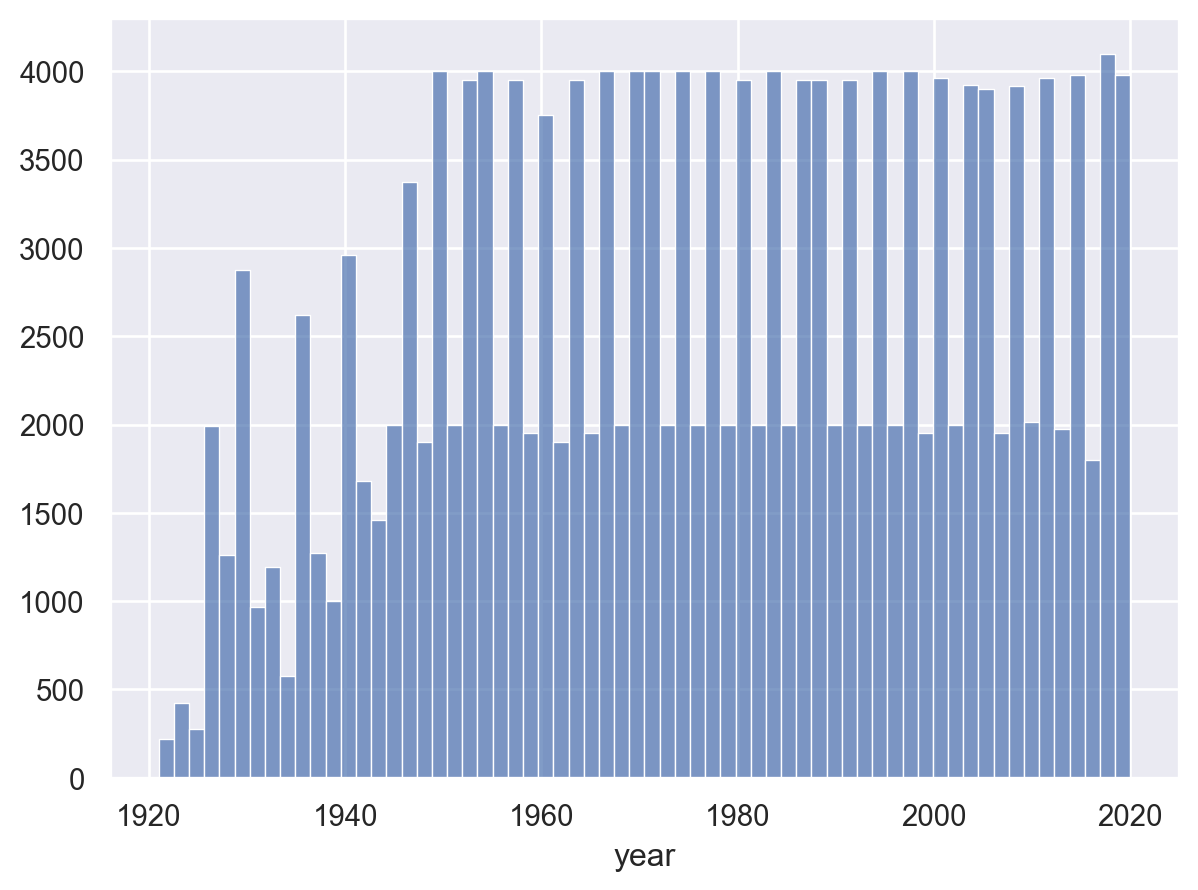

In [6]:
p = so.Plot(df, "year")
p.add(so.Bars(), so.Hist())

In [7]:
top_10_years = df["year"].value_counts(ascending=False).head(10)
print(f' The 10 years with the most releases in our dataset: \n{top_10_years}')

 The 10 years with the most releases in our dataset: 
year
2018    2103
2020    2030
2011    2017
2010    2016
2014    2005
2001    2005
1974    2000
1979    2000
1978    2000
1977    2000
Name: count, dtype: int64


## Valence

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [8]:
df["valence"].describe()

count    170653.000000
mean          0.528587
std           0.263171
min           0.000000
25%           0.317000
50%           0.540000
75%           0.747000
max           1.000000
Name: valence, dtype: float64

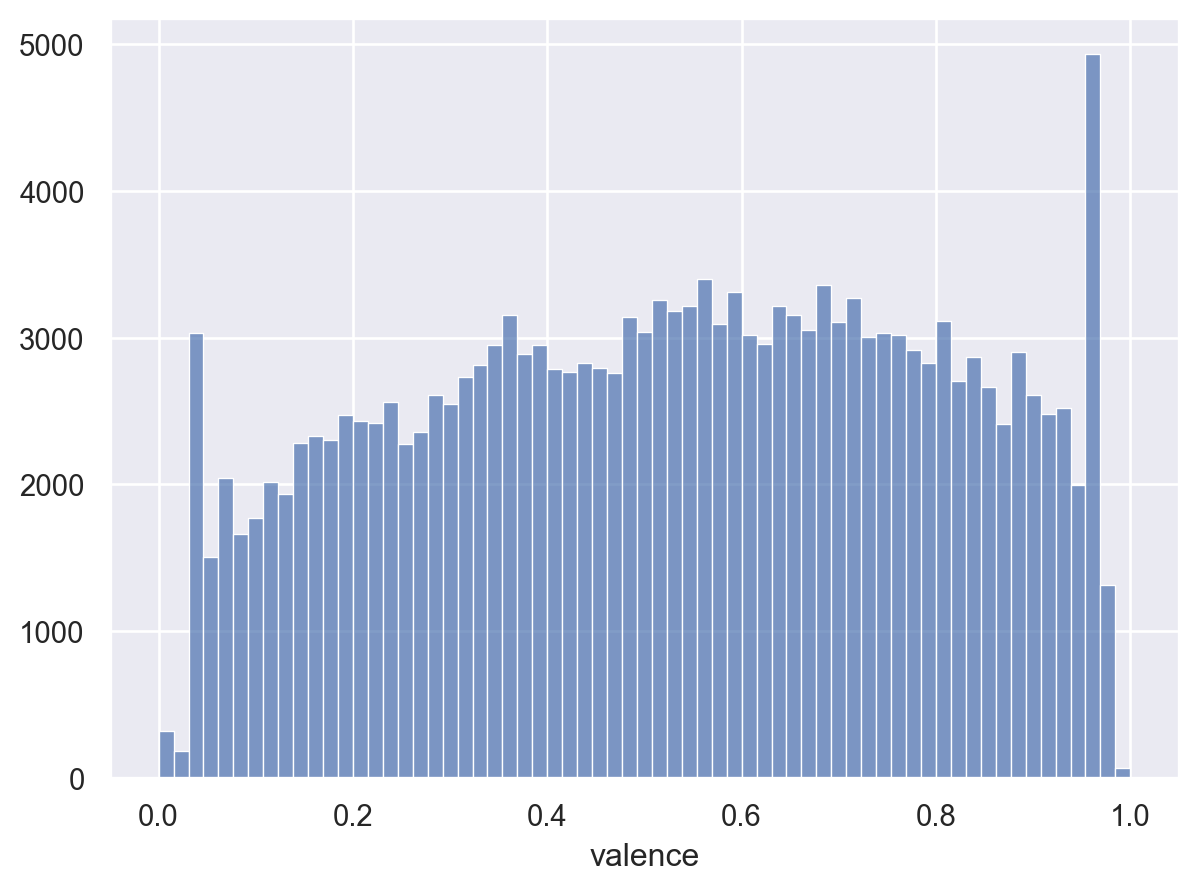

In [9]:
p = so.Plot(df, "valence")
p.add(so.Bars(), so.Hist())

## Acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

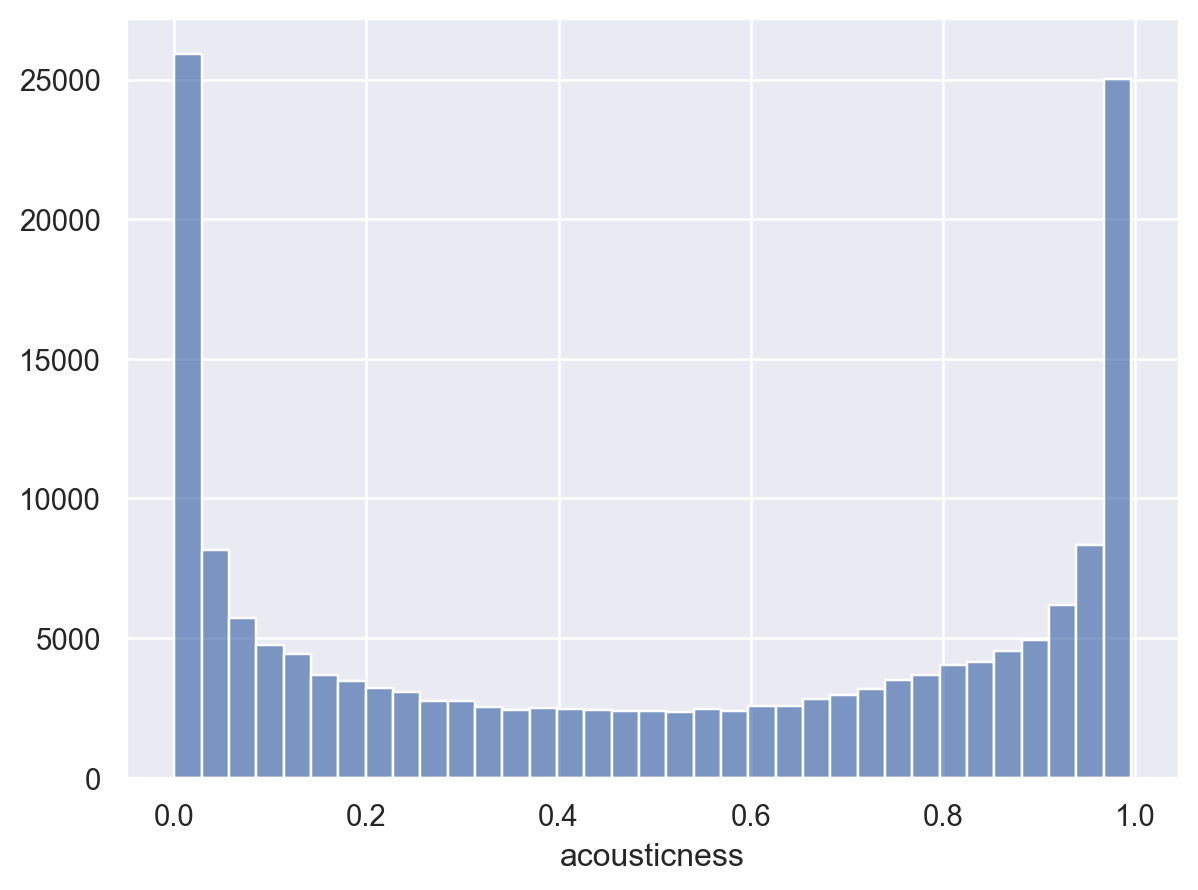

In [10]:
p = so.Plot(df, "acousticness")
p.add(so.Bars(), so.Hist())

## Song Duration

In [11]:
print(f' Average song length: {(df["duration_ms"].mean() / 60000)} minutes')
print(f' Max song length: {(df["duration_ms"].max() / 60000)} minutes')
print(f' Min song length: {(df["duration_ms"].min() / 60000)} minutes')

 Average song length: 3.8491385110917085 minutes
 Max song length: 90.05833333333334 minutes
 Min song length: 0.08513333333333334 minutes


Was going to convert the song duration column but now I'm thinking it's better to leave it in ms for purposes of modeling

In [12]:
'''


# convert milliseconds to seconds
def milliseconds_to_time(milliseconds):
    seconds = milliseconds / 1000
    return pd.to_datetime(seconds, unit='s').time()

# Apply the function to convert milliseconds to time
df['duration'] = df['duration_ms'].apply(milliseconds_to_time)

# Drop the intermediate column
df.drop(columns=['duration_ms'], inplace=True)

df["duration"].describe()

'''

'\n\n\n# convert milliseconds to seconds\ndef milliseconds_to_time(milliseconds):\n    seconds = milliseconds / 1000\n    return pd.to_datetime(seconds, unit=\'s\').time()\n\n# Apply the function to convert milliseconds to time\ndf[\'duration\'] = df[\'duration_ms\'].apply(milliseconds_to_time)\n\n# Drop the intermediate column\ndf.drop(columns=[\'duration_ms\'], inplace=True)\n\ndf["duration"].describe()\n\n'

## Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [13]:
df["energy"].describe()

count    170653.000000
mean          0.482389
std           0.267646
min           0.000000
25%           0.255000
50%           0.471000
75%           0.703000
max           1.000000
Name: energy, dtype: float64

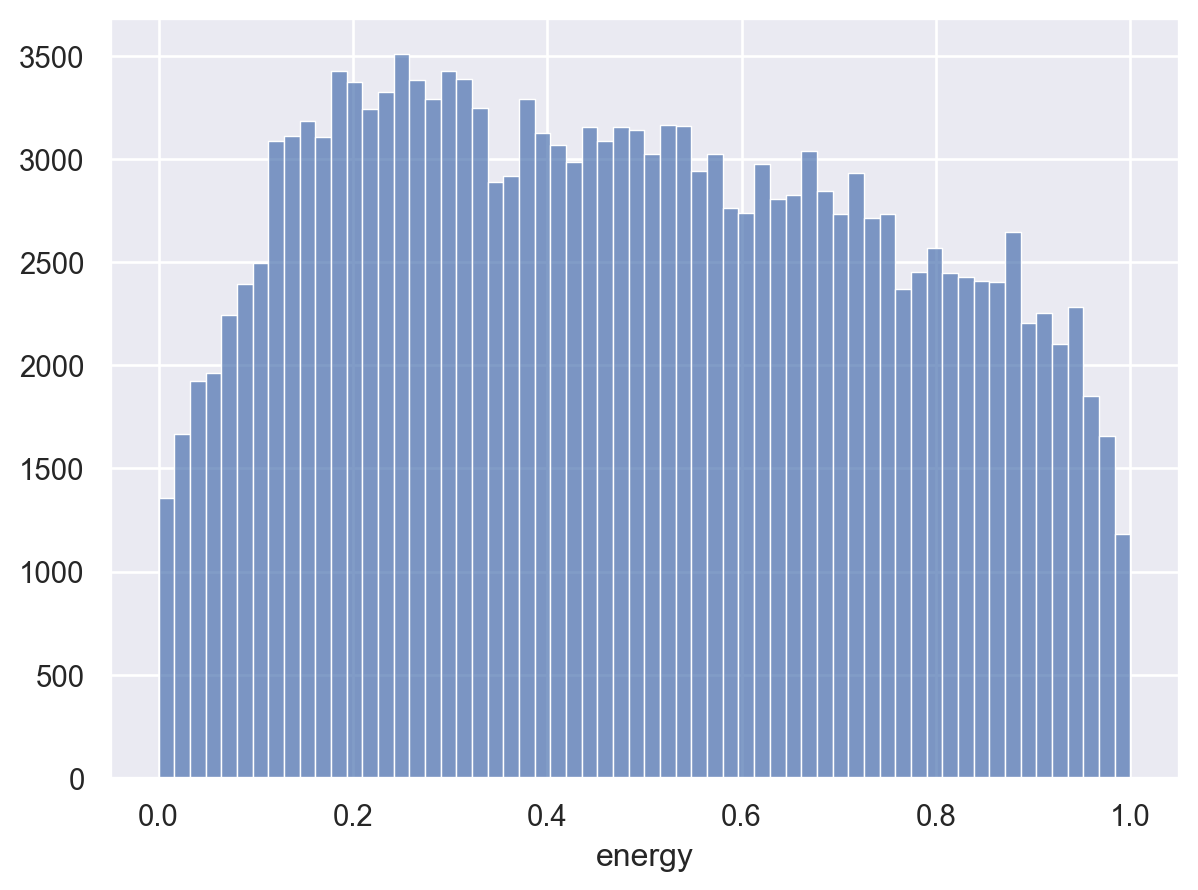

In [14]:
p = so.Plot(df, "energy")
p.add(so.Bars(), so.Hist())

## Instrumentalness

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [15]:
df["instrumentalness"].describe()

count    170653.000000
mean          0.167010
std           0.313475
min           0.000000
25%           0.000000
50%           0.000216
75%           0.102000
max           1.000000
Name: instrumentalness, dtype: float64

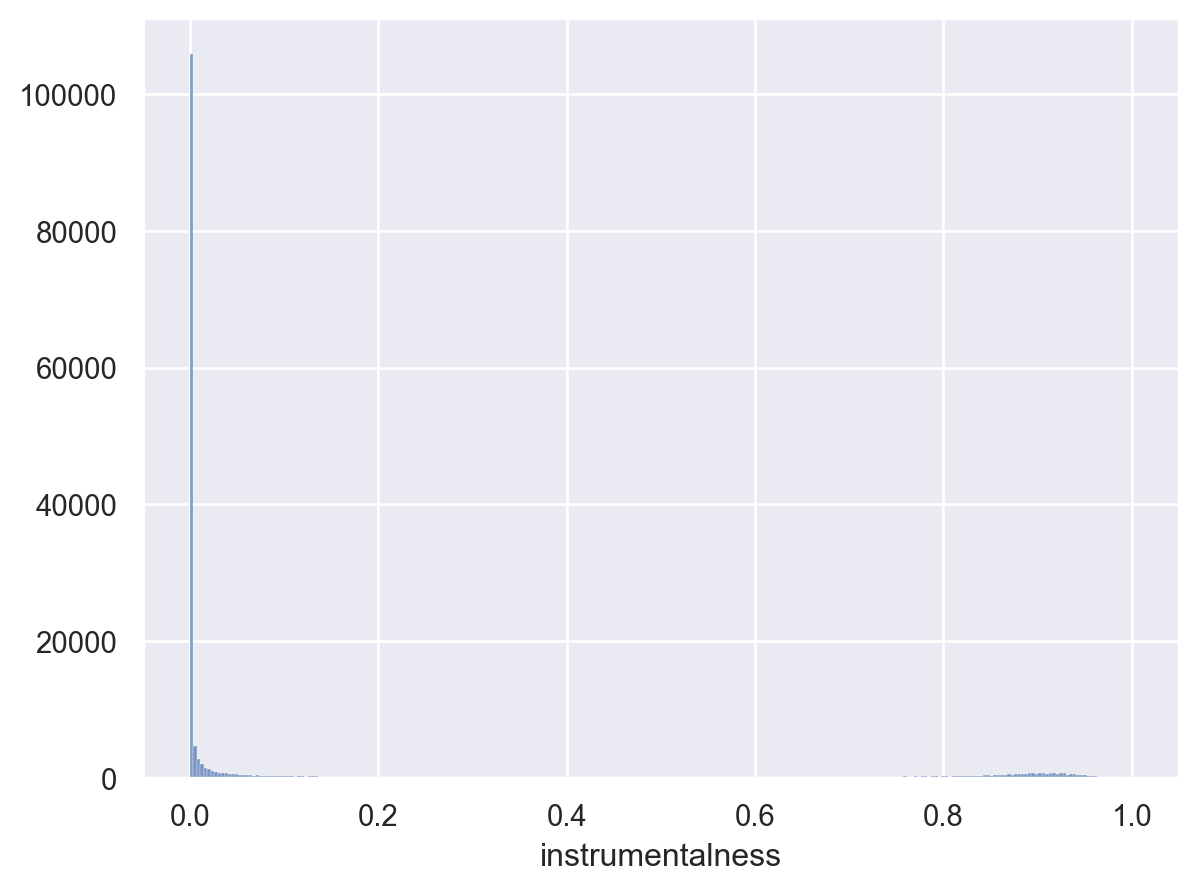

In [16]:
p = so.Plot(df, "instrumentalness")
p.add(so.Bars(), so.Hist())

In [17]:
zero_instrumentalness = df.loc[df["instrumentalness"] == 0]
print(f' Number of songs with an "instrumentalness" measure of zero: {zero_instrumentalness["id"].value_counts().sum()}')

 Number of songs with an "instrumentalness" measure of zero: 46580


## Popularity

In [18]:
df["popularity"].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [19]:
df.loc[df['popularity'] == 0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
8,0.721,1921,0.996,['Ignacio Corsini'],0.485,161520,0.1300,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.771,1921,0.982,['Fortugé'],0.684,196560,0.2570,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378
10,0.826,1921,0.995,['Maurice Chevalier'],0.463,147133,0.2600,0,0BMkRpQtDoKjcgzCpnqLNa,0.000000,9,0.258,-16.894,1,Dans La Vie Faut Pas S'en Faire,0,1921,0.0557,85.146
11,0.578,1921,0.994,['Ignacio Corsini'],0.378,155413,0.1150,0,0F30WM8qRpO8kdolepZqdM,0.906000,10,0.110,-27.039,0,Por Que Me Dejaste - Remasterizado,0,1921-03-20,0.0414,70.370
12,0.493,1921,0.990,['Georgel'],0.315,190800,0.3630,0,0H3k2CvJvHULnWChlbeFgx,0.000000,5,0.292,-12.562,0,La Vipère,0,1921,0.0546,174.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157550,0.578,1954,0.976,"['Richard Strauss', 'Alfred Poell', 'Ludwig We...",0.424,308600,0.4480,0,0yRjRgvO8kR6E9fehn07tE,0.000112,5,0.436,-13.290,1,"Der Rosenkavalier, Op.59 / Act 3: ""Zur Stelle!...",0,1954-01-01,0.0954,82.350
157551,0.960,1954,0.985,['Krosno Ensemble'],0.462,80827,0.0949,0,0yVOxC0rsuYapJh7NkMgkX,0.000000,2,0.885,-23.748,1,Jacôk - Mountain Dancde,0,1954-01-01,0.1050,72.953
157552,0.439,1954,0.420,"['Girolamo Cavazzoni', 'Flor Peeters']",0.138,138427,0.0161,0,0yZj9jxtCYdzkDBX6LGmrL,0.934000,0,0.162,-14.880,0,Easter Hymn,0,1954-05-11,0.0328,70.063
170517,0.394,2020,0.696,['Arijit Singh'],0.420,272562,0.6820,0,5wS1sJr2rzh9AKYFpkqqnA,0.000018,11,0.162,-6.565,0,Jodi Bolo,0,2020-11-16,0.0410,112.009


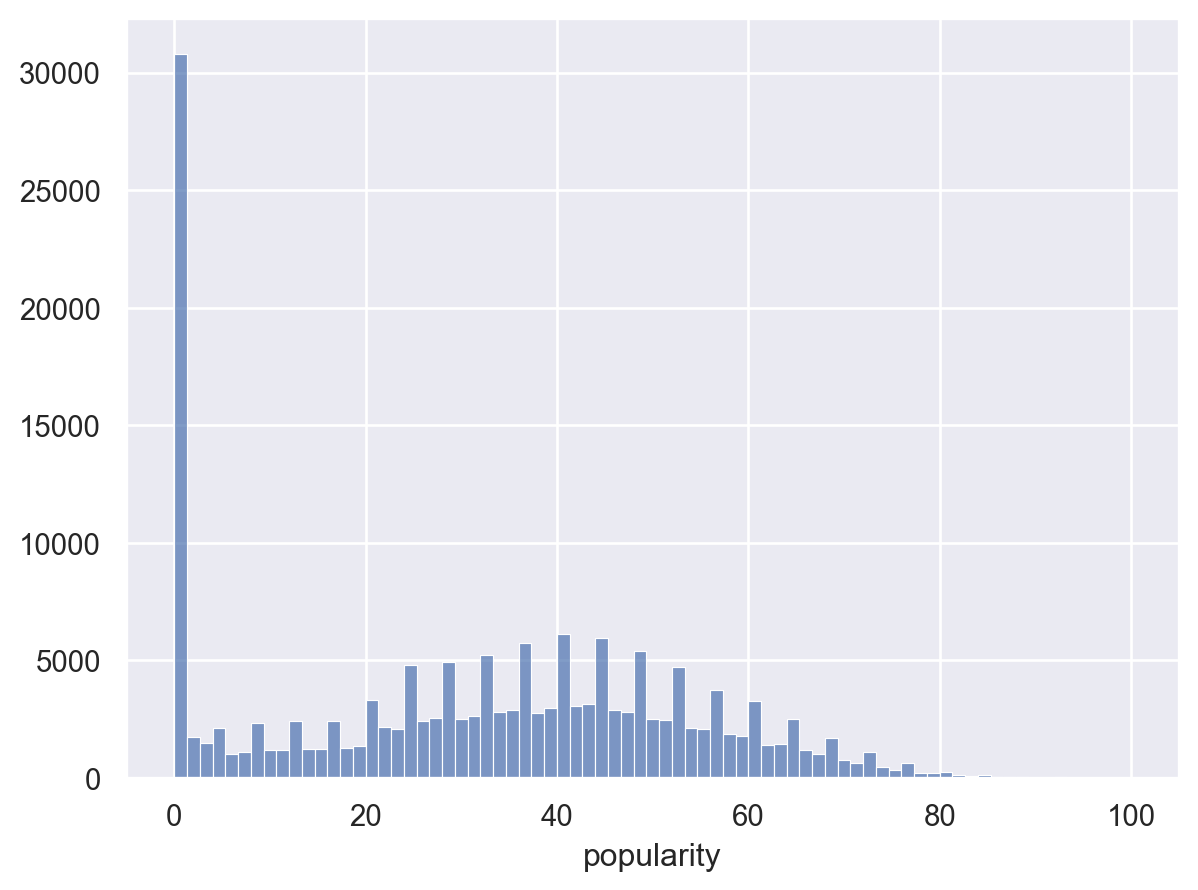

In [20]:
p = so.Plot(df, "popularity")
p.add(so.Bars(), so.Hist())

In [21]:
popularity_100 = df.loc[df["popularity"] == 100]
print(f' Number of songs with an "popularity" measure of 100: {popularity_100["id"].value_counts().sum()}')

popularity_0 = df.loc[df["popularity"] == 0]
print(f' Number of songs with an "popularity" measure of zero: {popularity_0["id"].value_counts().sum()}')

print('Mean "popularity" rating: 31.431794')

 Number of songs with an "popularity" measure of 100: 1
 Number of songs with an "popularity" measure of zero: 27892
Mean "popularity" rating: 31.431794


In [22]:
# dropping any song where "popularity" = 0 as it's likely 0 is just a placeholder for missing values
df.drop(df[df["popularity"] == 0].index, inplace=True)

In [23]:
# sanity check - this should equal 0
df.loc[df["popularity"] ==0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo


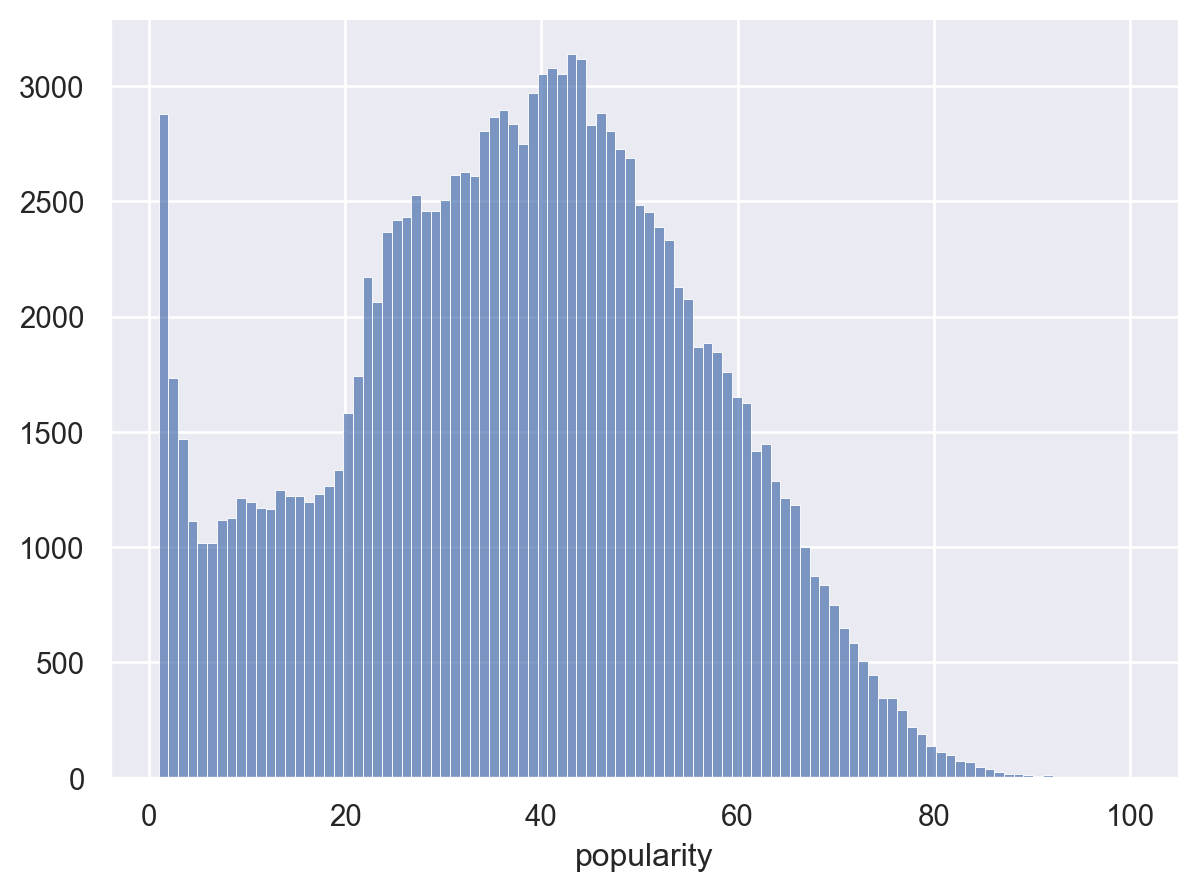

In [24]:
p = so.Plot(df, "popularity")
p.add(so.Bars(), so.Hist())

In [25]:
# Create the 'target' column using list comprehension
df['target'] = [1 if x > 50 else 0 for x in df['popularity']]
df.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,target
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0


## Tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

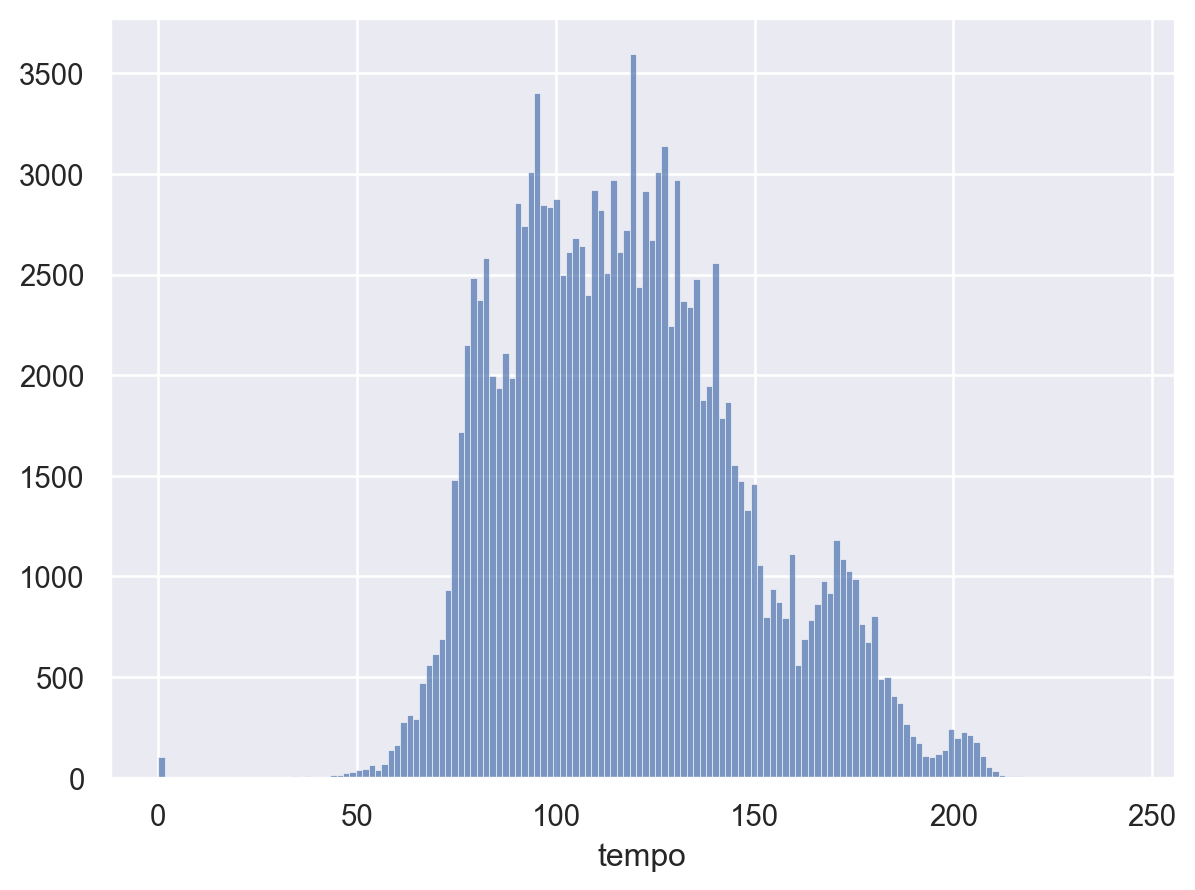

In [26]:
p = so.Plot(df, "tempo")
p.add(so.Bars(), so.Hist())     

## Speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

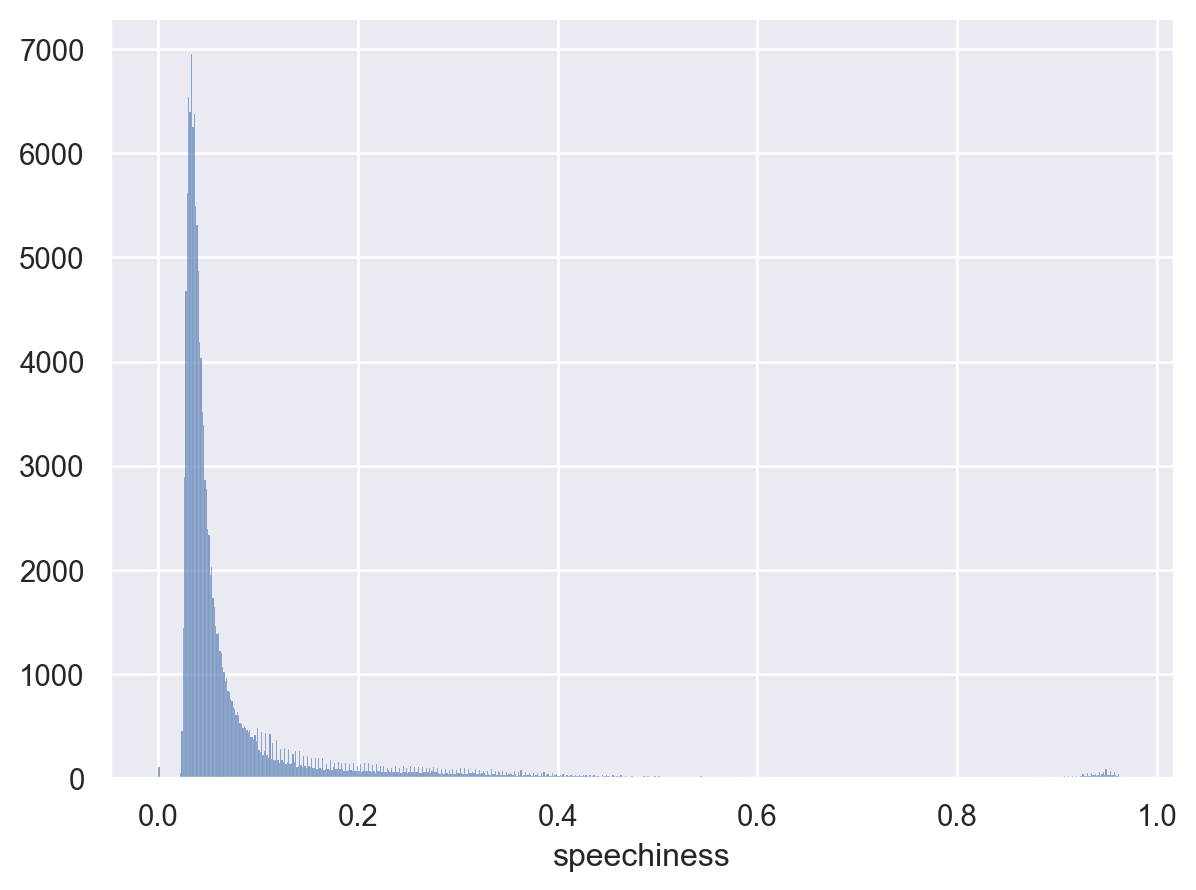

In [27]:
p = so.Plot(df, "speechiness")
p.add(so.Bars(), so.Hist())

In [28]:
df["release_date"].describe()

count     142761
unique     10794
top         1956
freq         947
Name: release_date, dtype: object

## Mode

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [29]:
df["mode"].value_counts()

mode
1    101228
0     41533
Name: count, dtype: int64

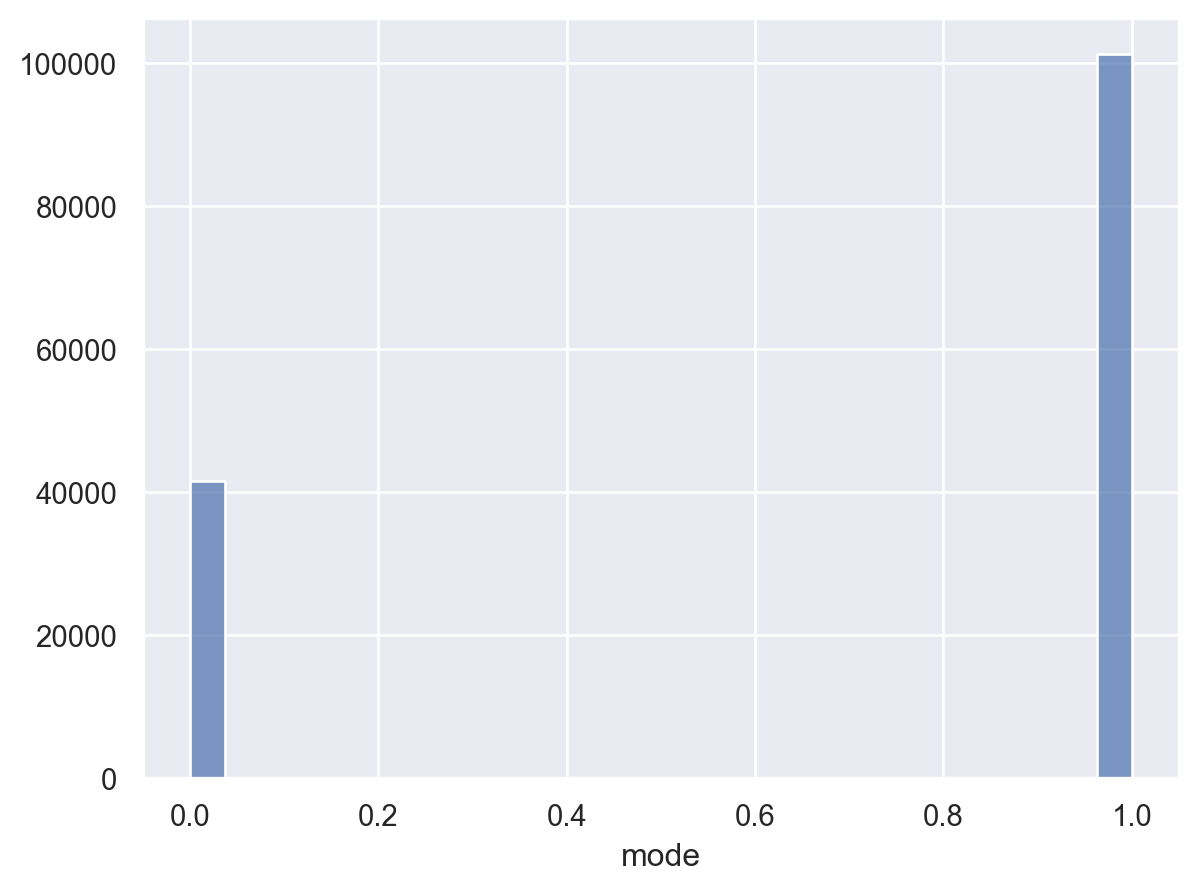

In [30]:
p = so.Plot(df, "mode")
p.add(so.Bars(), so.Hist())

## Loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

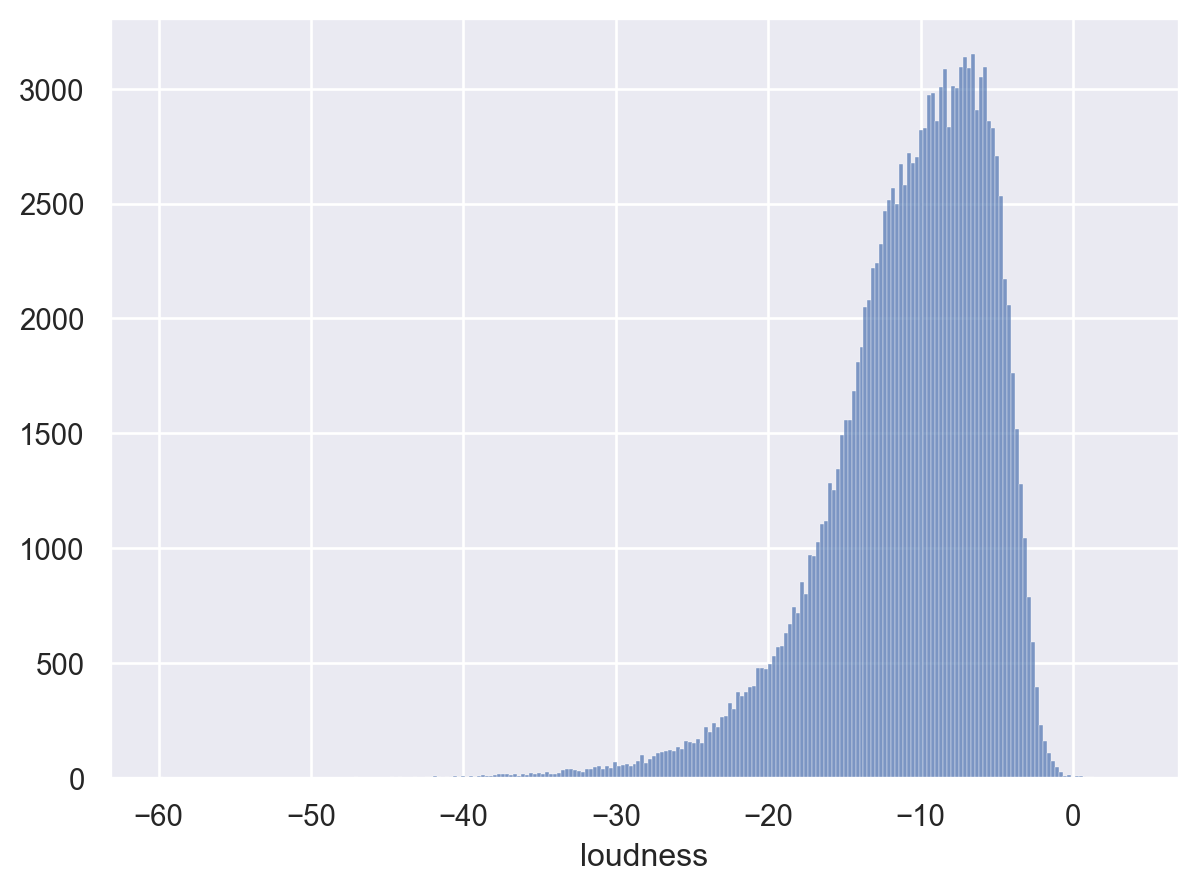

In [31]:
p = so.Plot(df, "loudness")
p.add(so.Bars(), so.Hist())

## Liveness

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

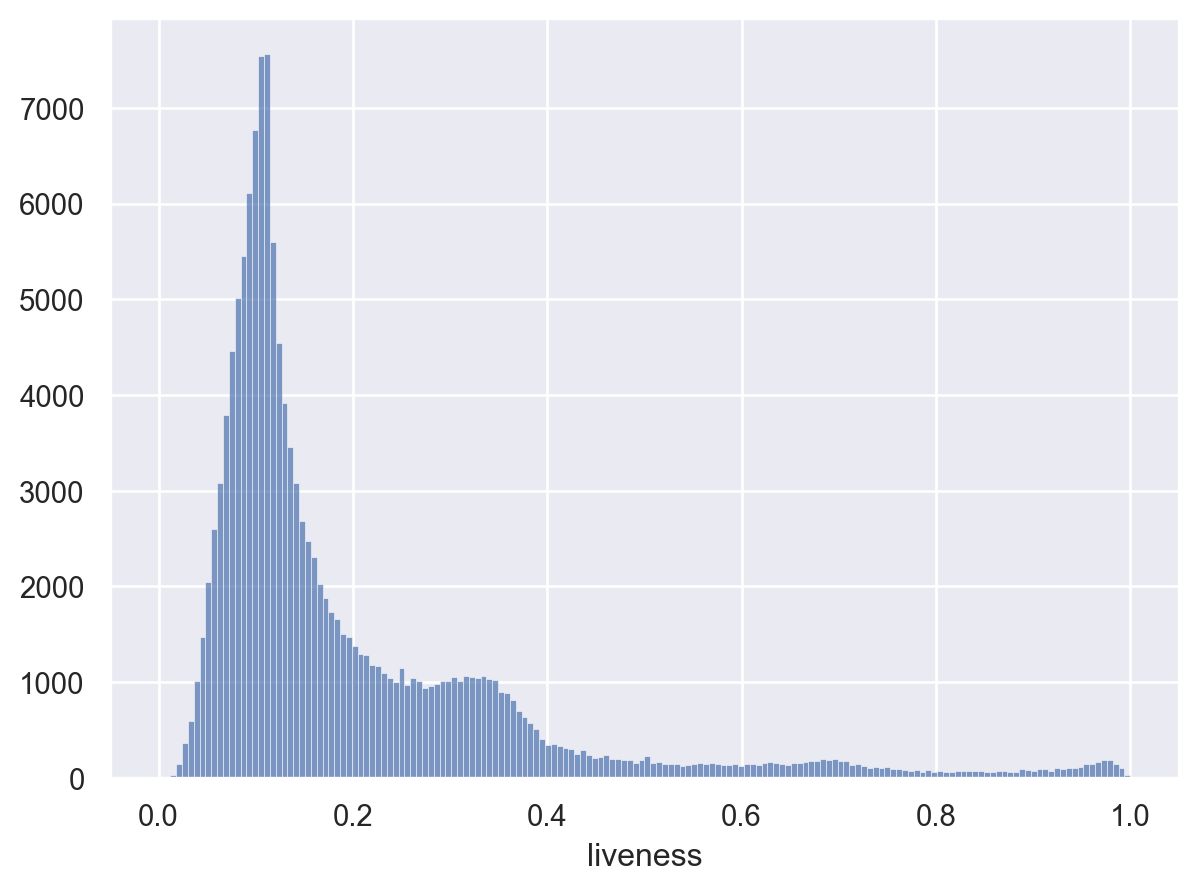

In [32]:
p = so.Plot(df, "liveness")
p.add(so.Bars(), so.Hist())

## Explicit

A marker of whether or not a song is explicit, presumably 0 meaning the song is not explicit, and 1 meaning a song is explicit. 

In [33]:
df["explicit"].value_counts()

explicit
0    130784
1     11977
Name: count, dtype: int64

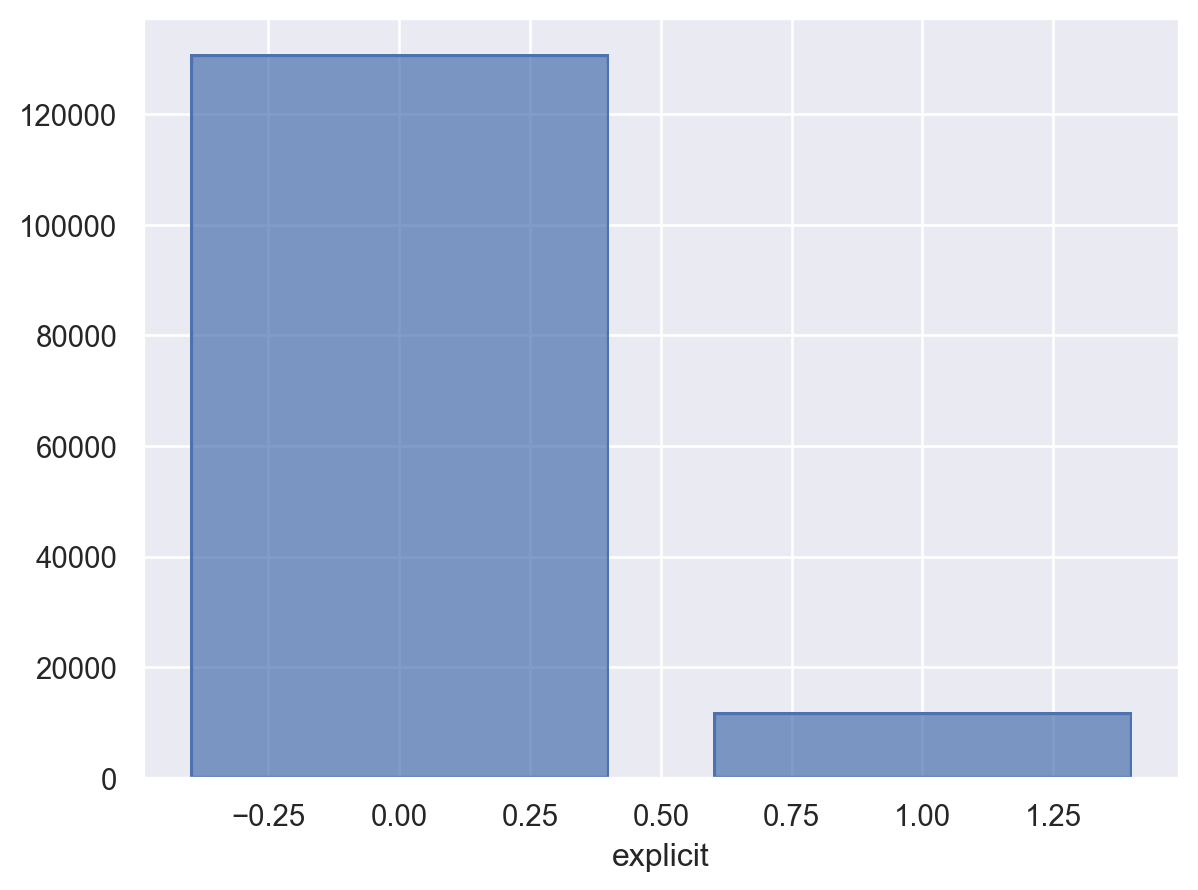

In [34]:
explicit = df["explicit"].value_counts()
so.Plot(x=explicit.index, y=explicit.values).add(so.Bar())

## Key

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

This is an int but it represents a string so let's change it to not get confused

In [35]:
keys_dict = {0:'C', 1:'C#/Db', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb', 7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11:'B'}
df['key'] = df['key'].map(keys_dict)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,target
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,A#/Bb,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,G,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,D#/Eb,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,0
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,F,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,D#/Eb,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


In [36]:
df["key"]. info()

<class 'pandas.core.series.Series'>
Index: 142761 entries, 0 to 170652
Series name: key
Non-Null Count   Dtype 
--------------   ----- 
142761 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


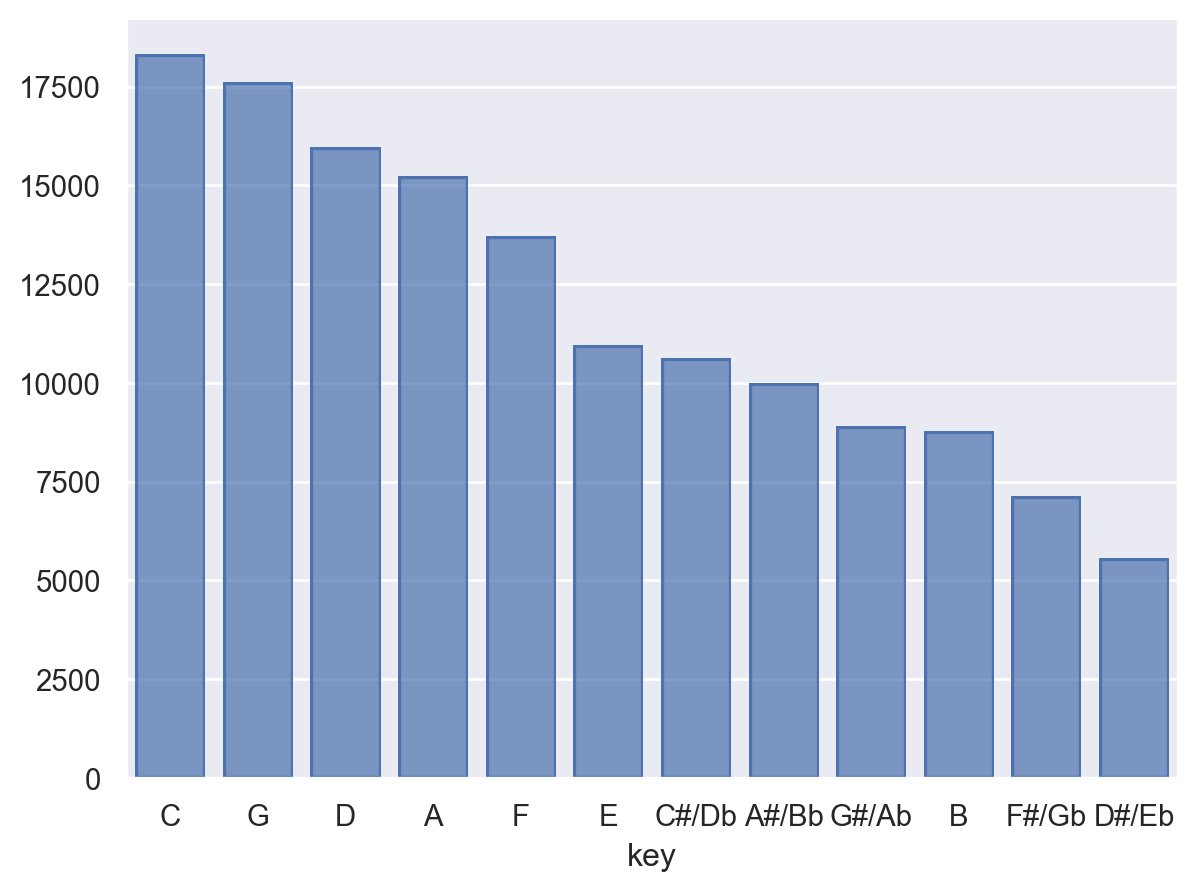

In [37]:
keys = df["key"].value_counts()
so.Plot(x=keys.index, y=keys.values).add(so.Bar())

# Model Preprocessing

In [38]:
# revisiting our dataset to see what features we have
df.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,target
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,A#/Bb,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0


In [39]:
df['target'].value_counts(normalize=True)

target
0    0.745827
1    0.254173
Name: proportion, dtype: float64

^^ There's clearly some class imbalance here ... I think we need to SMOTE...

In [40]:
# train test split
from sklearn.model_selection import train_test_split, GridSearchCV

to_drop = ['popularity', 'id', 'artists', 'name', 'release_date', 'year', 'target']

X = df.drop(labels= to_drop, axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107070 entries, 16892 to 6841
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           107070 non-null  float64
 1   acousticness      107070 non-null  float64
 2   danceability      107070 non-null  float64
 3   duration_ms       107070 non-null  int64  
 4   energy            107070 non-null  float64
 5   explicit          107070 non-null  int64  
 6   instrumentalness  107070 non-null  float64
 7   key               107070 non-null  object 
 8   liveness          107070 non-null  float64
 9   loudness          107070 non-null  float64
 10  mode              107070 non-null  int64  
 11  speechiness       107070 non-null  float64
 12  tempo             107070 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 11.4+ MB


In [41]:
y_train[:5]

16892     1
38597     1
52021     0
166319    0
25424     0
Name: target, dtype: int64

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35691 entries, 48077 to 61842
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           35691 non-null  float64
 1   acousticness      35691 non-null  float64
 2   danceability      35691 non-null  float64
 3   duration_ms       35691 non-null  int64  
 4   energy            35691 non-null  float64
 5   explicit          35691 non-null  int64  
 6   instrumentalness  35691 non-null  float64
 7   key               35691 non-null  object 
 8   liveness          35691 non-null  float64
 9   loudness          35691 non-null  float64
 10  mode              35691 non-null  int64  
 11  speechiness       35691 non-null  float64
 12  tempo             35691 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 3.8+ MB


# Baseline Model - might delete this since we didn't do any preprocessing, it feels a little irrelevant
let's just do a dummy classifier

In [43]:
from sklearn.dummy import DummyClassifier
# Instantiate the model
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model to our newly encoded dataset
dummy_model.fit(X_train, y_train)

# predicting the first 10
dummy_model.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# checking the ratio of 1 to 0 in our training set
print(y_train.value_counts(normalize=True))

target
0    0.746372
1    0.253628
Name: proportion, dtype: float64


This tracks that the dummy classifier gave us zeroes as our train and test have basically the same ratio of 0 to 1

# First model - no SMOTE

In [46]:
#!pip install imblearn

In [161]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report



numeric_features = ['valence', 'acousticness','energy', 'danceability', 'duration_ms', 'explicit', 'instrumentalness', 
              'liveness', 'loudness', 'mode', 'speechiness', 'tempo']
numeric_transformer = StandardScaler()

categorical_features = ['key']
categorical_transformer = OneHotEncoder()


CT = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Logistic Regression Pipeline with SMOTE and GridSearchCV
pipe_lr = ImPipeline(steps=[
    ('preprocessor', CT),
    ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))
])

In [197]:
pipe_lr.fit(X_train, y_train)

#  predictions
y_predict_lr = pipe_lr.predict(X_test)
y_predict_lr

array([0, 0, 1, ..., 0, 0, 0])

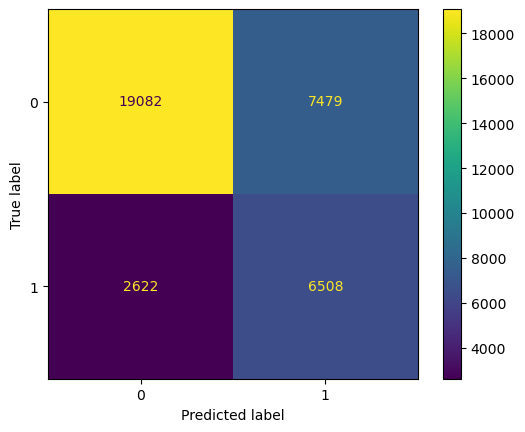

In [98]:
# plotting a confusion matrix to assess our model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [128]:
print(f"""
Our model's accuracy on the test set is {round(accuracy_score(y_test, y_predict_lr), 2)}.
Our model's recall on the test set is {round(recall_score(y_test, y_predict_lr), 2)}.
Our model's precision on the test set is {round(precision_score(y_test, y_predict_lr), 2)}.
Our model's f1-score on the test is {round(f1_score(y_test, y_predict_lr), 2)}.
""")

# Print classification report
print(classification_report(y_test, y_predict_lr))


Our model's accuracy on the test set is 0.72.
Our model's recall on the test set is 0.71.
Our model's precision on the test set is 0.47.
Our model's f1-score on the test is 0.56.

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     26561
           1       0.47      0.71      0.56      9130

    accuracy                           0.72     35691
   macro avg       0.67      0.72      0.68     35691
weighted avg       0.77      0.72      0.73     35691



# Evaluation 

The evaluation metric that I think makes the most sense is precision. If we have a false positive (a song is listed as popular but it is not) there is a higher probability the listener will skip the song if they don't like it. If we have a false negative (a song is not listed as popular but it is) it will likely not be recommended to the listener and will hence not be heard. For business purposes, it makes the most sense to maximize listening time.

# Now let's try with SMOTE

In [162]:
from imblearn.over_sampling import SMOTE

# Logistic Regression Pipeline with SMOTE and GridSearchCV
pipe_smote_lr = ImPipeline(steps=[
    ('preprocessor', CT),
    ('smote', SMOTE(random_state=27)),
    ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))
])

In [77]:
pipe_smote_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valence', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'explicit',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo']),
                                                 ('cat', OneHotEncoder(),
                                                  ['key'])])),
                ('smote', SMOTE(random_state=27)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [ ]:
# Extract the trained logistic regression classifier from the pipeline
lr_model = pipe_smote_dt.named_steps['classifier']

In [196]:
# predictions
y_predict_smote_lr = lr_model.predict(X_test)
y_predict_smote_lr

array([0, 0, 1, ..., 0, 0, 0])

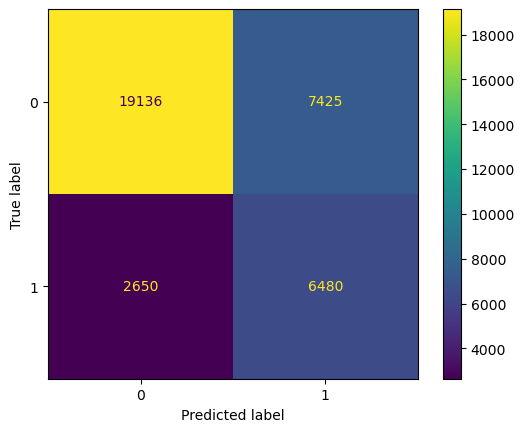

In [123]:
# plotting a confusion matrix to assess our model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict_smote_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [129]:
print(f"""
Our model's accuracy on the test set is {round(accuracy_score(y_test, y_predict_smote_lr), 2)}.
Our model's recall on the test set is {round(recall_score(y_test, y_predict_smote_lr), 2)}.
Our model's precision on the test set is {round(precision_score(y_test, y_predict_smote_lr), 2)}.
Our model's f1-score on the test is {round(f1_score(y_test, y_predict_smote_lr), 2)}.
""")

# Print classification report
print(classification_report(y_test, y_predict_smote_lr))


Our model's accuracy on the test set is 0.72.
Our model's recall on the test set is 0.71.
Our model's precision on the test set is 0.47.
Our model's f1-score on the test is 0.56.

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     26561
           1       0.47      0.71      0.56      9130

    accuracy                           0.72     35691
   macro avg       0.67      0.72      0.68     35691
weighted avg       0.77      0.72      0.73     35691



It looks like there is minimal difference with SMOTE.

# Decision Tree for Feature Importance


Our model's accuracy on the test set is 0.71.
Our model's recall on the test set is 0.66.
Our model's precision on the test set is 0.46.
Our model's f1-score on the test is 0.54.

              precision    recall  f1-score   support

           0       0.86      0.73      0.79     26561
           1       0.46      0.66      0.54      9130

    accuracy                           0.71     35691
   macro avg       0.66      0.70      0.67     35691
weighted avg       0.76      0.71      0.73     35691



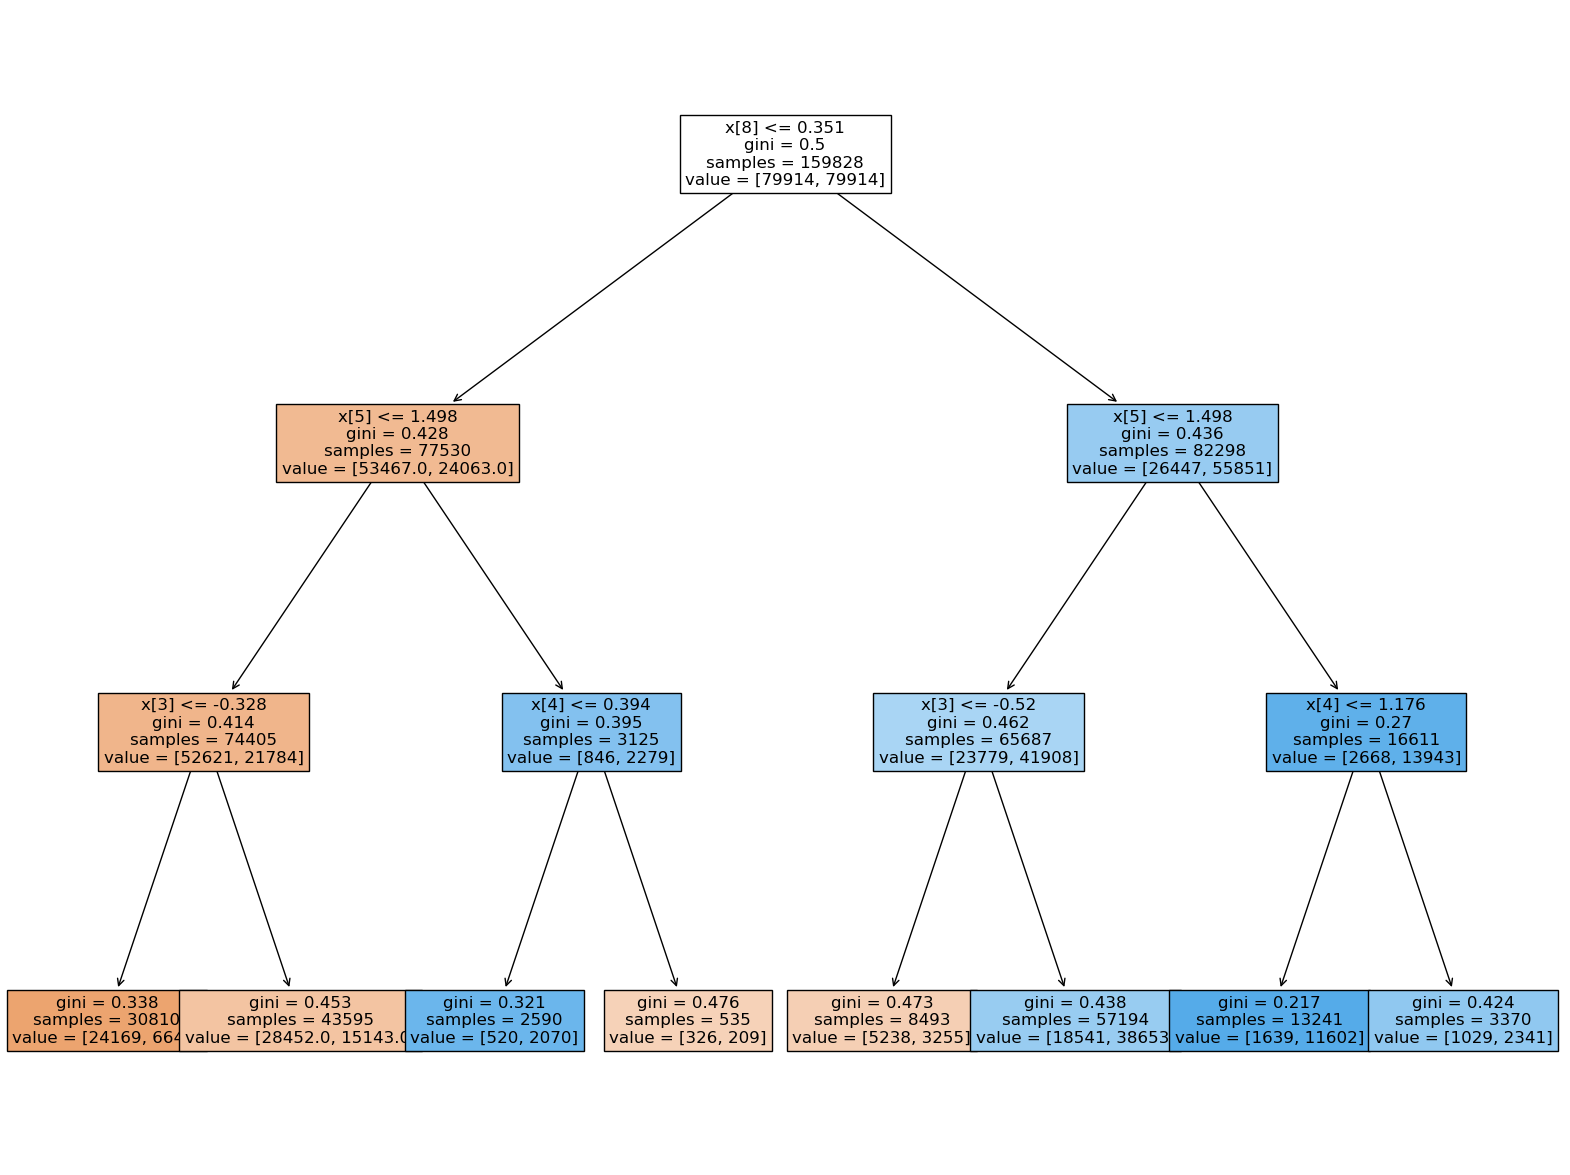

In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the pipeline
pipe_smote_dt = ImPipeline(steps=[
    ('preprocessor', CT),
    ('smote', SMOTE(random_state=27)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=27))
])

# Fit the pipeline to the training data
pipe_smote_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = pipe_smote_dt.predict(X_test)

# Evaluate the model
print(f"""
Our model's accuracy on the test set is {round(accuracy_score(y_test, y_pred_dt), 2)}.
Our model's recall on the test set is {round(recall_score(y_test, y_pred_dt), 2)}.
Our model's precision on the test set is {round(precision_score(y_test, y_pred_dt), 2)}.
Our model's f1-score on the test is {round(f1_score(y_test, y_pred_dt), 2)}.
""")

# Print classification report
print(classification_report(y_test, y_pred_dt))

# Extract the trained decision tree classifier from the pipeline
dt_model = pipe_smote_dt.named_steps['dt']

# Plotting the decision tree
plt.figure(figsize=(20, 15))  # Set plot size (denoted in inches)
plot_tree(dt_model, filled=True, fontsize=12)
plt.show()

In [140]:
X_train.iloc[:, 4]

16892     0.2810
38597     0.6090
52021     0.6840
166319    0.3650
25424     0.0419
           ...  
6550      0.1880
16581     0.8290
45745     0.6320
144287    0.8780
6841      0.0199
Name: energy, Length: 107070, dtype: float64

# The features that the decision tree split on are key, energy, danceability, and duration. Let's try running a model with just those columns.  

In [176]:
# singling out those 4 columns
X_train_small = X_train[['energy', 'key', 'danceability', 'duration_ms']]
X_train_small.head()

,energy,key,danceability,duration_ms
16892,0.2810,F,0.571,233667
38597,0.6090,F,0.575,226220
52021,0.6840,E,0.754,220467
166319,0.3650,F,0.728,158825
25424,0.0419,E,0.451,145147


In [175]:
X_train_small.loc[X_train_small["key"] == 'D']

,energy,key,danceability,duration_ms
87335,0.9380,D,0.400,239721
157935,0.1300,D,0.665,315840
138403,0.3780,D,0.704,164027
47493,0.6050,D,0.819,185533
35099,0.7610,D,0.778,228000
...,...,...,...,...
30707,0.0743,D,0.353,201067
145991,0.5350,D,0.274,184467
134505,0.7490,D,0.649,207733
123942,0.6990,D,0.882,257267


In [151]:
X_train_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107070 entries, 16892 to 6841
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   energy        107070 non-null  float64
 1   key           107070 non-null  object 
 2   danceability  107070 non-null  float64
 3   duration_ms   107070 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 4.1+ MB


In [178]:
# we need to define a new pipeline since the orinigal column transformer was trained on the full X_train set

numeric_small = ['energy', 'danceability', 'duration_ms']
categorical_small = ['key']

ss_nn = StandardScaler()
ohe_nn = OneHotEncoder(handle_unknown='ignore')

numeric_transformed = ss_nn.fit_transform(X_train_small[numeric_small])
cat_transformed = ohe_nn.fit_transform(X_train_small[categorical_small])

print("Numeric Transformed Shape:", numeric_transformed.shape)
print("Categorical Transformed Shape:", cat_transformed.shape)

# Convert the sparse matrix to a dense numpy array
cat_transformed_dense = cat_transformed.toarray()

# Concatenate the transformed numeric and categorical features
X_train_small_processed = np.concatenate([numeric_transformed, cat_transformed_dense], axis=1)

Numeric Transformed Shape: (107070, 3)
Categorical Transformed Shape: (107070, 12)


# this isn't working. I'll look at it later


In [191]:
'''
small_model = LogisticRegression()

small_model.fit(X_train_small_processed, y_train)

# Make predictions
y_pred_small = small_model.predict(X_test)
print(y_pred_small)
'''

'\nsmall_model = LogisticRegression()\n\nsmall_model.fit(X_train_small_processed, y_train)\n\n# Make predictions\ny_pred_small = small_model.predict(X_test)\nprint(y_pred_small)\n'

In [193]:
'''
# confusion matrix
cm = confusion_matrix(y_test, y_predict_smote_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
'''

'\n# confusion matrix\ncm = confusion_matrix(y_test, y_predict_smote_lr)\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm)\ndisp.plot()\nplt.show()\n'

In [194]:
'''
print(f"""
Our model's accuracy on the test set is {round(accuracy_score(y_test, y_predict_smote_lr), 2)}.
Our model's recall on the test set is {round(recall_score(y_test, y_predict_smote_lr), 2)}.
Our model's precision on the test set is {round(precision_score(y_test, y_predict_smote_lr), 2)}.
Our model's f1-score on the test is {round(f1_score(y_test, y_predict_smote_lr), 2)}.
""")

# Print classification report
print(classification_report(y_test, y_predict_smote_lr))
'''

'\nprint(f"""\nOur model\'s accuracy on the test set is {round(accuracy_score(y_test, y_predict_smote_lr), 2)}.\nOur model\'s recall on the test set is {round(recall_score(y_test, y_predict_smote_lr), 2)}.\nOur model\'s precision on the test set is {round(precision_score(y_test, y_predict_smote_lr), 2)}.\nOur model\'s f1-score on the test is {round(f1_score(y_test, y_predict_smote_lr), 2)}.\n""")\n\n# Print classification report\nprint(classification_report(y_test, y_predict_smote_lr))\n'

## Grid Search? might get rid of this

In [81]:
'''
# Sample 100% of the training data for initial tuning
# Create a random sample of 100 rows
X_train_sample = X_train.sample(n=100, random_state=27)
y_train_sample = y_train.sample(n=100, random_state=27)

# Split the sampled data into small training and testing sets
small_X_train, small_X_test, small_y_train, small_y_test = train_test_split(
    X_train_sample, y_train_sample, test_size=0.25, random_state=27)
    '''

In [83]:
'''
# let's try a gridsearch with cross validation
parameters = {'rfc__criterion': ['gini', 'entropy'],
          'rfc__max_depth': [3, 5],
          'smote__k_neighbors': [3, 5, 9]}

gs = GridSearchCV(estimator=pipe_smote_rf,
                 param_grid=parameters,
                 cv=5)

# fit to samples to minimize run time
#gs.fit(small_X_train, small_y_train)

print(#gs.best_params_)
                '''

In [ ]:
'''
new_parameters = {'rfc__criterion': ['gini', 'entropy'],
          'rfc__max_depth': [10, 20],
          'smote__k_neighbors': [3, 5, 9]}
          '''

# Recommendation System using Nearest Neighbors

We don't really have a target here, we're just looking at nearest neighbors and recommending neighbors 

For an evaluation metric, look into Mean Average Precision (MAP)????

"If your task involves ranking, such as recommendation systems, you can use Mean Average Precision (MAP) as an evaluation metric. MAP measures the average precision across different queries. For each query, you calculate the precision at each position in the list of recommended items and then average these precisions across all queries."

In [195]:
# creating a column with the combined track name and artist name for ease of understanding
df["track_and_artist"] = df.apply(lambda row: f'{row["name"]} by {row["artists"]}', axis=1)
df['track_and_artist'].iloc[50]

"Send Me to the 'Lectric Chair by ['Bessie Smith']"

In [154]:
# our X_train doesn't have the song name or artist, so we should add them back in to get recommendations

to_drop = ['popularity', 'release_date', 'target', 'id', 'name', 'artists']

X2 = df.drop(labels= to_drop, axis=1)
y2 = df['target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=27)

X_train2.set_index("track_and_artist", drop=True, inplace=True)

X_train2.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
track_and_artist,,,,,,,,,,,,,,
Luckiest Man by ['The Wood Brothers'],0.294,2006,0.7400,0.571,233667,0.2810,0,0.000000,F,0.1630,-10.560,1,0.0475,142.263
"You’re Mines Still (feat. Drake) by ['Yung Bleu', 'Drake']",0.339,2020,0.3170,0.575,226220,0.6090,1,0.000000,F,0.1050,-4.880,0,0.1210,83.004
Every Once In a While by ['BlackHawk'],0.775,1994,0.0516,0.754,220467,0.6840,0,0.000053,E,0.1070,-10.377,1,0.0291,116.955
Tu Mal Amor by ['Grupo Laberinto'],0.964,1999,0.7330,0.728,158825,0.3650,0,0.000000,F,0.0589,-7.871,1,0.0547,108.970
Suite No. 1: Yanvalloux by ['Frantz Casseus'],0.297,1954,0.9860,0.451,145147,0.0419,0,0.935000,E,0.2540,-27.313,0,0.0446,92.634


# Preprocessing again

There might be a better way to do this than all this code. I just redid everything by hand to make sure it was running becuase I have had so many error messages today

In [183]:
from sklearn.neighbors import NearestNeighbors


numeric_nn2 = ['valence', 'year', 'acousticness','energy', 'danceability', 'duration_ms', 'explicit', 'instrumentalness', 
              'liveness', 'loudness', 'mode', 'speechiness', 
             'tempo']
categorical_nn2 = ['key']


ss_nn2 = StandardScaler()
ohe_nn2 = OneHotEncoder(handle_unknown='ignore')

# TRAIN
train_numeric_transformed2 = ss_nn2.fit_transform(X_train2[numeric_nn2])
train_cat_transformed2 = ohe_nn2.fit_transform(X_train2[categorical_nn2])
# TEST
test_numeric_transformed2 = ss_nn2.transform(X_test2[numeric_nn2])
test_cat_transformed2 = ohe_nn2.transform(X_test2[categorical_nn2])


# Convert the sparse matrix to a dense numpy array
train_cat_transformed_dense = train_cat_transformed2.toarray()
test_cat_transformed_dense = test_cat_transformed2.toarray()

# Concatenate the transformed numeric and categorical features
X_train2_processed = np.concatenate([train_numeric_transformed2, train_cat_transformed_dense], axis=1)
X_test2_processed = np.concatenate([test_numeric_transformed2, test_cat_transformed_dense], axis=1)

model_nn = NearestNeighbors(metric='cosine', algorithm='brute')

model_nn.fit(X_train2_processed)

NearestNeighbors(algorithm='brute', metric='cosine')

In [186]:
# Make predictions
neighbors = model_nn.kneighbors(X_test2_processed, n_neighbors = 6)
print(neighbors)

(array([[0.03704964, 0.03704964, 0.04778277, 0.05095056, 0.05313673,
        0.05374054],
       [0.06560519, 0.07504909, 0.07856566, 0.083963  , 0.08630267,
        0.0912416 ],
       [0.01474272, 0.02104784, 0.02320349, 0.02462728, 0.02771597,
        0.03116734],
       ...,
       [0.02488147, 0.04080147, 0.04092928, 0.04588277, 0.05166745,
        0.05362536],
       [0.04369727, 0.04651717, 0.04954202, 0.05240637, 0.05502446,
        0.06656226],
       [0.0093675 , 0.01084496, 0.01227852, 0.01470112, 0.01522633,
        0.01668274]]), array([[ 36719,  92415,  27902,  65529,  17231,  88377],
       [ 24304,  18342,   8465,  68408,  84245,  20668],
       [ 86868,  33444,  36081,  26908,  46986,  30500],
       ...,
       [ 24938,  21348,  69472,  86860,  35341,  17506],
       [ 16851, 105090,  59252,  41022,  53764,  94537],
       [ 58258, 106254, 103273,  32108,   7109,  25052]]))


# Recommendation system - 
this part of the code was adapted from https://beckernick.github.io/music_recommender/ who created a sparse matrix instead of a numpy array
 
 After randomly selecting query_index, we retrieve the actual index (song name and artist) corresponding to that index from the original training set X_train2. Then, we use this actual index in the print statement to display the recommendations along with their actual index.

In [190]:
query_index = np.random.choice(len(X_train2_processed))
distances, indices = model_nn.kneighbors(X_train2_processed[query_index].reshape(1, -1), n_neighbors=6)

# Get the actual index (song name and artist) from X_train2
actual_index = X_train2.index[query_index]

print('Recommendations similar to {0}:\n'.format(actual_index))

for i in range(1, len(distances.flatten())):
    recommended_index = X_train2.index[indices.flatten()[i]]
    print('{0}: {1}, with distance of {2}:'.format(i, recommended_index, distances.flatten()[i]))

Recommendations similar to Alive And Kicking by ['Simple Minds']:

1: The Whole of the Moon - 2004 Remaster by ['The Waterboys'], with distance of 0.009978126771303053:
2: It Can Happen - Cinema Version by ['Yes'], with distance of 0.02489442026132105:
3: Underground by ['David Bowie'], with distance of 0.026130934785133397:
4: Worlock by ['Skinny Puppy'], with distance of 0.031094890305661593:
5: Check It Out by ['John Mellencamp'], with distance of 0.05558816907387076:


# FOR LATER - Uploading spotify urls for 30 - second previews

In [63]:
''' looking to see if we can get 30-second preview clips of each song 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def get_audio_preview(uri):
    client_credentials_manager = SpotifyClientCredentials(client_id='insert_here',
                                                          client_secret='insert_here')
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    
    track_id = uri.split(':')[-1]
    track_info = sp.track(track_id)
    
    audio_preview_url = track_info['preview_url']
    return audio_preview_url
    '''

" looking to see if we can get 30-second preview clips of each song \nimport spotipy\nfrom spotipy.oauth2 import SpotifyClientCredentials\n\ndef get_audio_preview(uri):\n    client_credentials_manager = SpotifyClientCredentials(client_id='insert_here',\n                                                          client_secret='insert_here')\n    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)\n    \n    track_id = uri.split(':')[-1]\n    track_info = sp.track(track_id)\n    \n    audio_preview_url = track_info['preview_url']\n    return audio_preview_url\n    "

In [64]:
'''# testing out getting the urls
audio_preview_url = get_audio_preview('spotify:track:5uCax9HTNlzGybIStD3vDh')
audio_preview_url'''

"# testing out getting the urls\naudio_preview_url = get_audio_preview('spotify:track:5uCax9HTNlzGybIStD3vDh')\naudio_preview_url"

# Also for later - maybe try K Means clustering? I already did this for the genres in another notebook, should be pretty easy to replicate here. This could lead to playlist suggestions based on clusters of songs?

https://medium.com/@david.de.hernandez/modeling-data-for-a-spotify-recommender-system-3056997a0fc5

^^ This article is excellent 